<h2>Homework 1: Linear Regression on Boston Housing Data</h2>

You're asked to do the following tasks to predict boston house price:
<lu>
<li>Use scikit-learn</li>
<li>Implement analytical solution (normal equation) to obtain weights</li>
<li>Implement numerical solution (gradient descent) to obtain weights</li>
</lu>
    Note: the accuracy of your implementations should be close to that of a linear model from scikit-learn

In addition, you need to show the resulting intercept and coefficents, calculate errors on training dataset and testing dataset, and plot a figure to show your predictions and real prices on the testing dataset. 

In [1]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [2]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

<h4>Use scikit-learn library in the following cell</h4>

Intercept: 
 [ 30.28894834]
Coefficients: 
 [[ -1.12463481e-01   3.00810168e-02   4.07309919e-02   2.78676719e+00
   -1.72406347e+01   4.43248784e+00  -6.23998173e-03  -1.44848504e+00
    2.62113793e-01  -1.06390978e-02  -9.16398679e-01   1.24516469e-02
   -5.09349120e-01]]
Train Data MSE: 
 21.6415740967
Test Data MSE: 
 24.3114269297


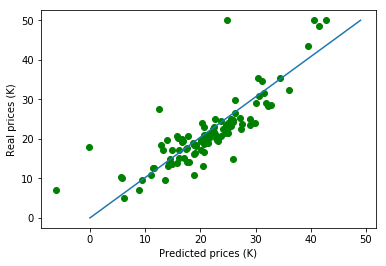

In [3]:
# Task 1-1: use linear regression in sklearn
reg = linear_model.LinearRegression()
reg = reg.fit(train_data, train_target) # fit to the training data

# Task 1-2: show intercept and coefficents
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

# Task 1-3: show errors on training dataset and testing dataset
predictions = reg.predict(train_data) # get predictions based on fitted model
distances = train_target - predictions # get distance for each prediction from target
error = np.mean(distances ** 2) # compute the mean square error
print('Train Data MSE: \n', error)

predictions = reg.predict(test_data) # get predictions based on fitted model
distances = test_target - predictions # get distance for each prediction from target
error = np.mean(distances ** 2) # compute the mean square error
print('Test Data MSE: \n', error)

# Task 1-4: show plot a figure to show your predictions and real prices on the testing dataset
plt.scatter(predictions, test_target, color='green')

plt.xlabel('Predicted prices (K)')
plt.ylabel('Real prices (K)')

#plot line
max = np.amax(test_target); # get max price of test label
plt.plot(np.linspace(0, max, max));

<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

Intercept: 
 30.2889483394
Coefficients: 
 [ -1.12463481e-01   3.00810168e-02   4.07309919e-02   2.78676719e+00
  -1.72406347e+01   4.43248784e+00  -6.23998173e-03  -1.44848504e+00
   2.62113793e-01  -1.06390978e-02  -9.16398679e-01   1.24516469e-02
  -5.09349120e-01]
Train Data MSE: 
 21.6415740967
Test Data MSE: 
 24.3114269297


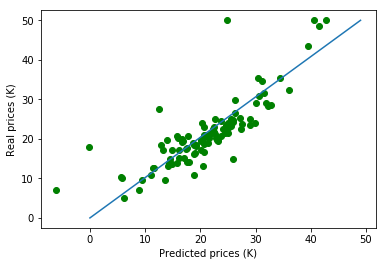

In [4]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights
def myNormalEqualFun(X,y):
    """
    Find wieghts with least cost by solving -[(X^T)(t - Xw)]/N=0, where X is training data and t is target
    """
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # equivalent to [(X^T*X)^-1]*X^T*y
    return w.T
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return X.dot(w.T)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)

# Task 2-3: show intercept and coefficents
intercept = w[0][0] # get slice of intercept
print('Intercept: \n', intercept)
coefficients = w[0][1:] # get slice of coefficients
print('Coefficients: \n', coefficients)

# Task 2-4: show errors on training dataset and testing dataset
predictions = myPredictFun(train_data_intercept, w) # get predictions on fitted model
distances = train_target - predictions # get distance for each prediction from target
error = np.mean(distances ** 2) # compute the mean square error
print('Train Data MSE: \n', error)

predictions = myPredictFun(test_data_intercept, w) # get predictions on fitted model
distances = test_target - predictions # get distance for each prediction from target
error = np.mean(distances ** 2) # compute the mean square error
print('Test Data MSE: \n', error)


# Task 2-5: show plot a figure to show your predictions and real prices on the testing dataset
plt.scatter(predictions, test_target, color='green')
plt.xlabel('Predicted prices (K)')
plt.ylabel('Real prices (K)')

#plot line
max = np.amax(test_target); # get max price of test label
plt.plot(np.linspace(0, max, max));

<h4>Use numerical solution (gradient descent) to perform linear regression in the following cell</h4>

Intercept: 
 22.7965346535
Coefficients: 
 [-0.9959922   0.69501597  0.2793815   0.7195102  -2.02666553  3.1410082
 -0.17457063 -3.08308698  2.24540329 -1.76206124 -2.0397505   1.13871984
 -3.6170184 ]
Train Data MSE: 
 21.6415757572
Test Data MSE: 
 24.3133080567


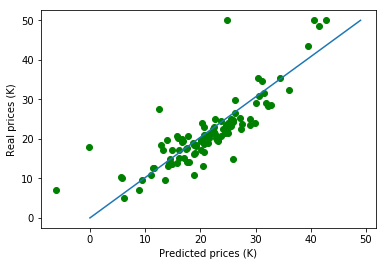

In [5]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: Weights
def myGradientDescentFun(X,y,learning_rate,numItrs):
    i = 0
    w = np.empty((14,1)) # initialize array with random values
    n = X.shape[0] # number of training examples
    while i < numItrs: # run [numItrs] times
        w += X.T.dot(y - X.dot(w)) * learning_rate / n # equivalent to w = w + e * (1/2) * X^T (y - Xw)
        i += 1
    return w.T

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return X.dot(w.T)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w = myGradientDescentFun(train_data_intercept,train_target,0.1,1000)

# Task 3-3: show intercept and coefficents
intercept = w[0][0] # get slice of intercept
print('Intercept: \n', intercept)
coefficients = w[0][1:] # get slice of coefficients
print('Coefficients: \n', coefficients)

# Task 3-4: show errors on training dataset and testing dataset
predictions = myPredictFun(train_data_intercept, w) # get predictions on fitted model
distances = train_target - predictions # get distance for each prediction from target
error = np.mean(distances ** 2) # compute the mean square error
print('Train Data MSE: \n', error)

predictions = myPredictFun(test_data_intercept, w) # get predictions on fitted model
distances = test_target - predictions # get distance for each prediction from target
error = np.mean(distances ** 2) # compute the mean square error
print('Test Data MSE: \n', error)


# Task 3-5: show plot a figure to show your predictions and real prices on the testing dataset
plt.scatter(predictions, test_target, color='green')
plt.xlabel('Predicted prices (K)')
plt.ylabel('Real prices (K)')

#plot line
max = np.amax(test_target); # get max price of test label
plt.plot(np.linspace(0, max, max));